In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf

In [24]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [3]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [16]:
img_rows, img_cols = 8, 8

In [4]:
dataset = pd.read_csv("../data/4_64points.txt")

In [5]:
dataset.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,gesture
0,7.0,70.0,21.0,1.0,3.0,4.0,1.0,11.0,5.0,60.0,...,25.0,5.0,73.0,28.0,26.0,8.0,21.0,44.0,40.0,0
1,67.0,73.0,11.0,22.0,18.0,8.0,16.0,13.0,72.0,10.0,...,43.0,32.0,52.0,11.0,26.0,13.0,7.0,35.0,10.0,0
2,29.0,32.0,9.0,0.0,7.0,5.0,52.0,34.0,12.0,59.0,...,0.0,0.0,90.0,12.0,1.0,7.0,2.0,10.0,1.0,0
3,43.0,37.0,11.0,123.0,3.0,14.0,25.0,3.0,48.0,79.0,...,9.0,33.0,11.0,3.0,56.0,4.0,2.0,1.0,17.0,0
4,39.0,21.0,8.0,72.0,9.0,10.0,9.0,5.0,53.0,40.0,...,34.0,82.0,9.0,24.0,6.0,5.0,7.0,12.0,4.0,0


In [6]:
dataset = dataset.dropna()
dataset_train = np.array(dataset)
dataset_train = dataset_train[np.random.permutation(len(dataset_train))]
X_train = dataset_train[:,:-1]
Y_train = dataset_train[:,-1:]

In [7]:
Y_train = [int(i) for i in Y_train]
Y_train = np.eye(np.max(Y_train) + 1)[Y_train]
Y_train.shape

(4196, 4)

In [8]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [10]:
X_train = X_train.reshape(4196,8,8)

In [11]:
for graph in X_train:
    for i in range(8):
        m = max(graph[i])
        for j in range(8):
            graph[i][j] = graph[i][j]/m

In [18]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [19]:
X_train.shape

(4196, 8, 8, 1)

In [20]:
Y_train.shape

(4196, 4)

In [28]:
input_shape

(8, 8, 1)

In [70]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [71]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [72]:
history = model.fit(X_train, Y_train,
          batch_size=16,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Train on 3356 samples, validate on 840 samples
Epoch 1/25
3356/3356 [==============================] - 1s 284us/step - loss: 0.4789 - accuracy: 0.8117 - val_loss: 0.2162 - val_accuracy: 0.9286
Epoch 2/25
3356/3356 [==============================] - 1s 240us/step - loss: 0.2194 - accuracy: 0.9285 - val_loss: 0.1836 - val_accuracy: 0.9381
Epoch 3/25
3356/3356 [==============================] - 1s 227us/step - loss: 0.1820 - accuracy: 0.9407 - val_loss: 0.1484 - val_accuracy: 0.9548
Epoch 4/25
3356/3356 [==============================] - 1s 226us/step - loss: 0.1638 - accuracy: 0.9476 - val_loss: 0.1643 - val_accuracy: 0.9417
Epoch 5/25
3356/3356 [==============================] - 1s 226us/step - loss: 0.1592 - accuracy: 0.9526 - val_loss: 0.1350 - val_accuracy: 0.9524
Epoch 6/25
3356/3356 [==============================] - 1s 227us/step - loss: 0.1505 - accuracy: 0.9523 - val_loss: 0.1238 - val_accuracy: 0.9583
Epoch 7/25
3356/3356 [==============================] - 1s 232us/step - loss:

Text(0.5, 1.0, 'Accuracy')

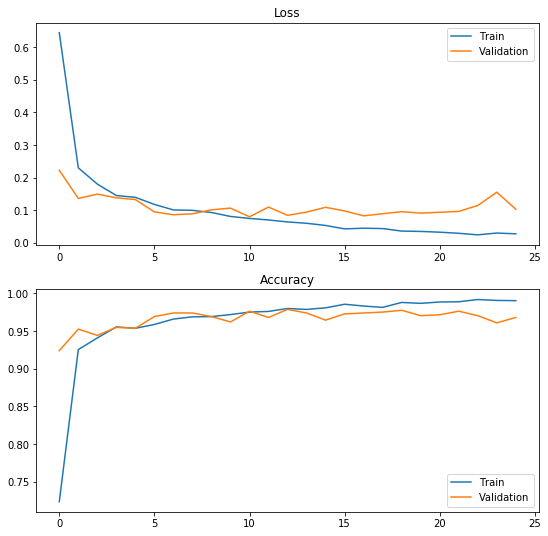

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Train","Validation"])
plt.title("Loss")
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.title("Accuracy")